In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
url='https://drive.google.com/file/d/1xp8eI2r4Gfdj8IngIcncecxpOVHgkHJM/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [103]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-18,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-18,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-18,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-18,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-18,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-18,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-18,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-18,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-18,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [104]:
df.duplicated().value_counts() #No duplicate values

False    10000
dtype: int64

In [105]:
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [106]:
df['emp_length']=df['emp_length'].replace(np.nan,0)
df['emp_length']=df['emp_length'].astype(int)

In [107]:
df.dtypes #changed emp_length to integer

emp_title                            object
emp_length                            int64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    


# Describe the dataset and any issues with it.


In [108]:
df.describe

<bound method NDFrame.describe of                     emp_title  emp_length state homeownership  annual_income  \
0     global config engineer            3    NJ      MORTGAGE        90000.0   
1      warehouse office clerk          10    HI          RENT        40000.0   
2                    assembly           3    WI          RENT        40000.0   
3            customer service           1    PA          RENT        30000.0   
4        security supervisor           10    CA          RENT        35000.0   
...                       ...         ...   ...           ...            ...   
9995                   owner           10    TX          RENT       108000.0   
9996                 director           8    PA      MORTGAGE       121000.0   
9997                toolmaker          10    CT      MORTGAGE        67000.0   
9998                  manager           1    WI      MORTGAGE        80000.0   
9999       operations analyst           3    CT          RENT        66000.0   

     

# Describing the Dataset:-
There are 10000 records of loans with 55 columns containing information regarding the loan.

There are no duplicated values in the dataset.

There are 10 columns that contains null values.



# Issues Regarding Dataset:-
1. As per the above observations, we can see that there are 10 columns which contains Null values. In order to clean this data, we can perform following operations:- 

  1) In terms of numeric data, we can either replace null values with 0 or with mean value or median value of that column(In this case, I have replaced null values with mean). Over here, we can't replace null values as it would change the context.

  2) In terms of text data, we can delete the rows containing null values if required.
 

2. Another issue is regarding the dataypes. Emp_Length is assigned float but Work experience years cannot be in float. So, we can convert it into integer. Also issue month is assigned object whereas it should be assigned as date.

3. Annual Income Joint and Debt to Income Joint both contains same no. of null Values. So, both the columns are dependent on each other.

4. Currents_Accounts_Delinq contains 0 in all the records. So, we can discard this column as it does not provide much information.

5. Many values in the columns(like verification income joint) contains blank values. we can simply replace it with np.nan i.e. NA values.

In [109]:
df.isnull().sum() #Checking for any null values

emp_title                            833
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [110]:
df.verification_income_joint=df.verification_income_joint.fillna(np.nan)

In [111]:
df=df.drop('current_accounts_delinq',axis=1)

Emp Title - Represents Title of Employee and consists 833 Null values. We don't have to remove this records.

Emp Length - Represents number of years worked as Employee.

State - Represents State of the Employee.

Homeownership - Represents whether home is owned/Mortgage/Rented.

Annual Income = Represents Annual Income of the Employee.

Verified Income = Represents Verified/Source Verified/ Not Verified.

Debt to Income = Represents Debt to Income Ratio.

Annual Income Joint = Represents Joint Annual Income.

Verification Income Joint = Represents Verified/Source Verified/ Not Verified.

Debt to Income Joint = Represents Debt to Income Joint Ratio.

Delinq 2y = Represents Delinquency for 2 years.



# Visuals

# 1. Analyzing Top 10 Employees who are interested in Loans (so that we can target that particular job group for loans).

In [112]:
v1=df.emp_title.value_counts()
v1=v1.to_frame()
v1=v1.reset_index()
v1.columns=['Title','Count']


In [113]:
v1.Count.sort_values(ascending=False)
v1=v1.head(10) #We are considering only top 10 Records to target that customers
v1

,Title,Count
0,manager,218
1,owner,204
2,teacher,201
3,driver,123
4,sales,97
5,registered nurse,88
6,rn,80
7,supervisor,79
8,truck driver,63
9,office manager,61


([<matplotlib.patches.Wedge at 0x7f9ab757e1d0>,
 [Text(0.9295530304349134, 0.5881591311960301, 'manager'),
  Text(-0.09382309323922727, 1.0959914357215679, 'owner'),
  Text(-0.9964702205349865, 0.46588313941047027, 'teacher'),
  Text(-1.0126912331268363, -0.42948395353964974, 'driver'),
  Text(-0.6214428387731217, -0.9076391343136346, 'sales'),
  Text(-0.13345981137661428, -1.0918738382923727, 'registered nurse'),
  Text(0.33883559517798817, -1.046513468351162, 'rn'),
  Text(0.7291070688172594, -0.8236521609275995, 'supervisor'),
  Text(0.976331887213538, -0.5067307431072754, 'truck driver'),
  Text(1.086323259702808, -0.17292129836623843, 'office manager')],
 [Text(0.5070289256917709, 0.32081407156147096, '18.0%'),
  Text(-0.051176232675942145, 0.5978135103935823, '16.8%'),
  Text(-0.5435292112009016, 0.25411807604207465, '16.6%'),
  Text(-0.5523770362510015, -0.23426397465799073, '10.1%'),
  Text(-0.3389688211489754, -0.4950758914438006, '8.0%'),
  Text(-0.0727962607508805, -0.595567

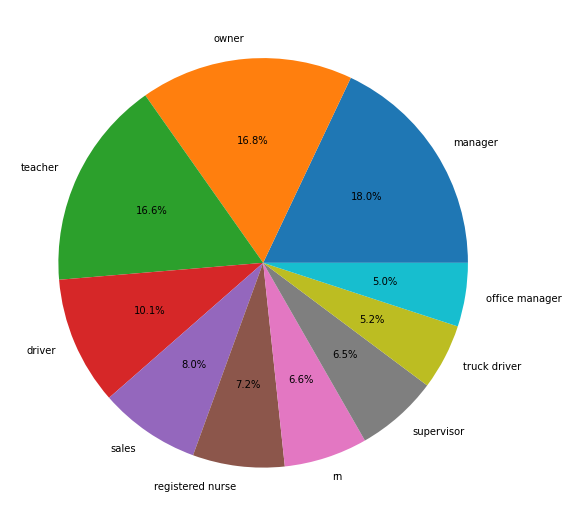

In [114]:
plt.figure(figsize=(8,10))
plt.pie(v1.Count,autopct='%1.1f%%',labels=v1.Title)

With this analysis, we can target this top 10 job employees as they are the ones who are taking loan more often as per the records.

So, with the help of this visuals, we can target Managers, Owners and Teachers for taking loans.

# 2. Analyzing Top 10 State who are taking loans.

In [115]:
v2=df.state.value_counts()
v2=v2.to_frame()
v2=v2.reset_index()
v2.columns=['State','Count']
v2.Count.sort_values(ascending=False)
v2=v2.head(10) #We are considering only top 10 Records to target that customers
v2


,State,Count
0,CA,1330
1,TX,806
2,NY,793
3,FL,732
4,IL,382
5,NJ,338
6,OH,338
7,GA,334
8,NC,299
9,PA,298


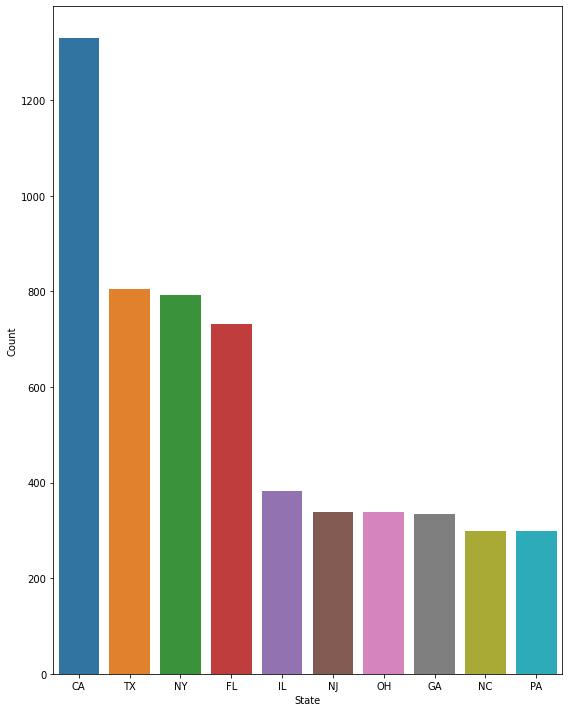

In [116]:
plt.figure(figsize=(8,10))
sns.barplot(data=v2, x='State', y='Count')

With this visual, we can see that California, Texas, New york and Florida are the states where people are taking most loans.

# 3. Visualizing Loan Purpose

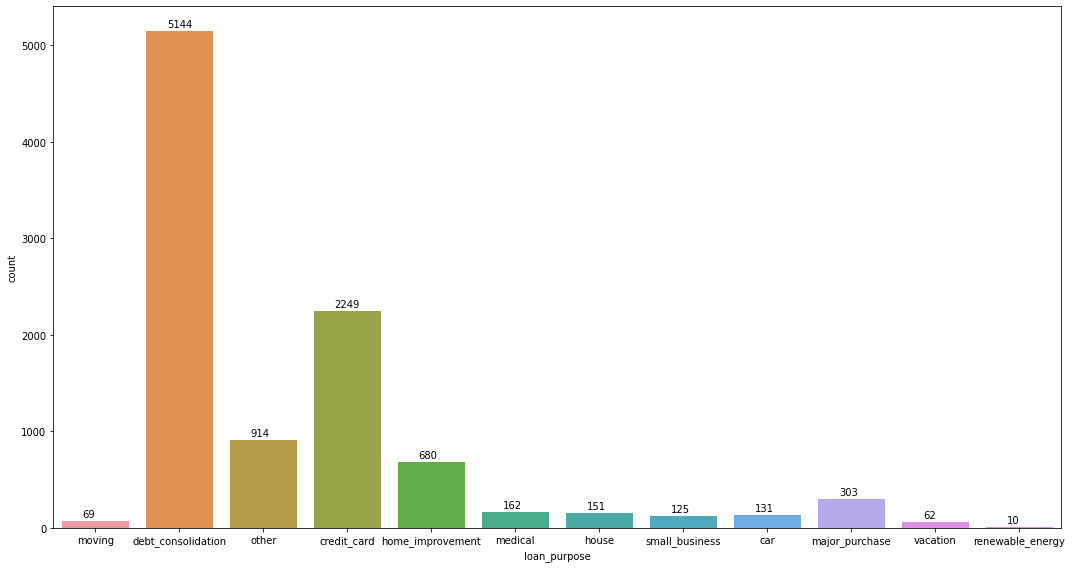

In [117]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='loan_purpose')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+40.0))

Over here, we can see that Debt_Consolidation and credit card loans are the most number of loans offered. So, we can target such customers for the above purposes.

# 4. Loan Interest rates depending on type of Home

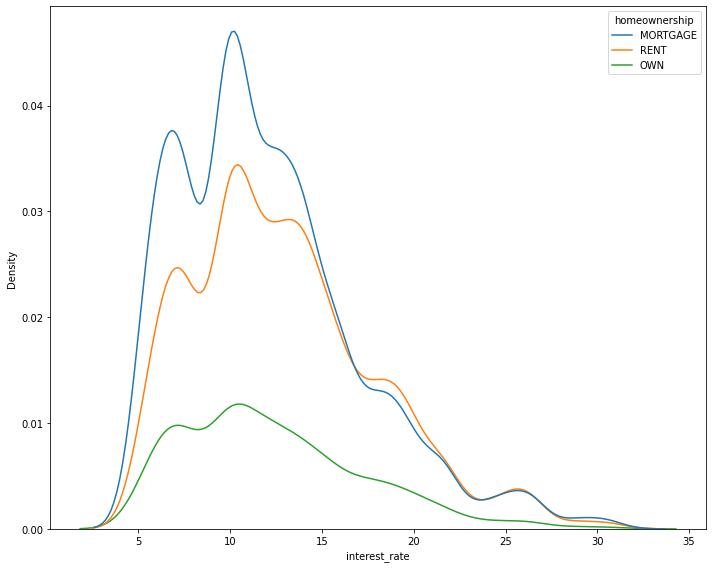

In [118]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df,x='interest_rate',hue='homeownership')

Interest rate increases if House is on Mortgage whereas for those who own thier house gets lower interest rate.

# 5. Visualizing Application Type vs Grade wise

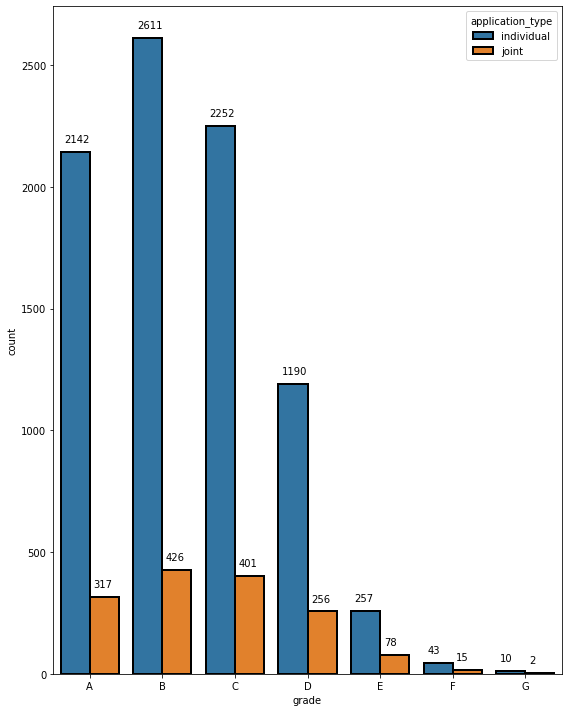

In [119]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(8,10))
order=['A','B','C','D','E','F','G']
ax=sns.countplot(data=df,x='grade',hue='application_type', order=order,ec='black',lw=2)  
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+40.0))
plt.show()

Over here, the number of applications for Grade A,B and C are more in terms of individual and joint account.

# 6. Mean Annual Income getting loans

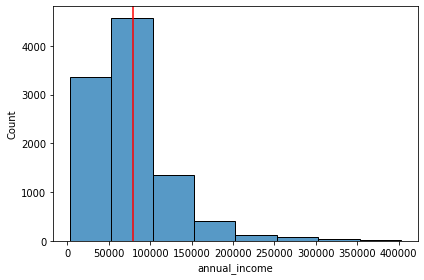

In [120]:
sns.histplot(df,x='annual_income',binwidth=50000,binrange=(3000,388000))
plt.axvline(x=df.annual_income.mean(),
            color='red')

Mean annual income is around 79222 which is plotted as the red line. Different Bins are created to get an idea about the count of annual income.

# 7. Relationship between total debit limit to interest rate

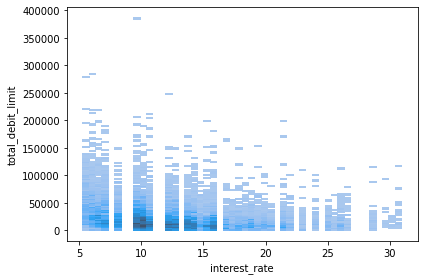

In [121]:
sns.histplot(df, x='interest_rate', y='total_debit_limit')


# Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. 

# 1. Linear Regression

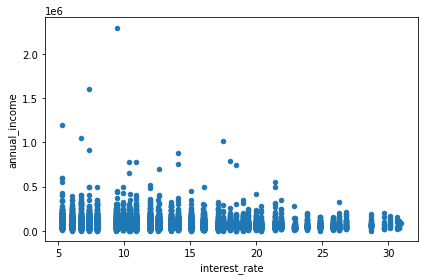

In [122]:
df.plot.scatter(x='interest_rate',y='annual_income')

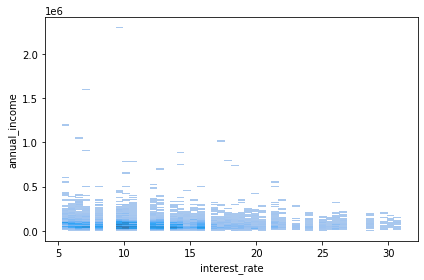

In [123]:
sns.histplot(df,x='interest_rate',y='annual_income')

Over here, their's one outlier which is present at the top of Test Result. We need to remove it.

In [124]:
df.drop(725,axis=0,inplace=True)#deleting outlier

In [125]:
df.iloc[725,:]

emp_title                                  bookkeeper 
emp_length                                          10
state                                               NY
homeownership                                 MORTGAGE
annual_income                                1020000.0
verified_income                        Source Verified
debt_to_income                                    1.75
annual_income_joint                                NaN
verification_income_joint                          NaN
debt_to_income_joint                               NaN
delinq_2y                                            0
months_since_last_delinq                           NaN
earliest_credit_line                              1997
inquiries_last_12m                                   4
total_credit_lines                                  27
open_credit_lines                                   21
total_credit_limit                              284151
total_credit_utilized                            52723
num_collec

In [126]:
X=df.loc[:,['interest_rate']]
y=df.loc[:,'annual_income']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

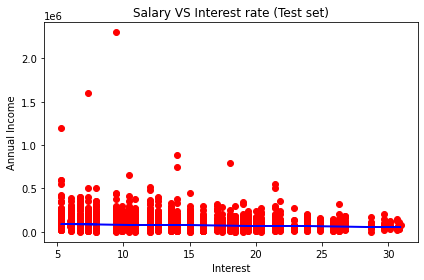

In [127]:
train = plt
train.scatter(X_train, y_train, color='red')
train.plot(X_train, regressor.predict(X_train), color='blue')
train.title('Salary VS Interest rate (Test set)')
train.xlabel('Interest')
train.ylabel('Annual Income')
train.show()
train.show()



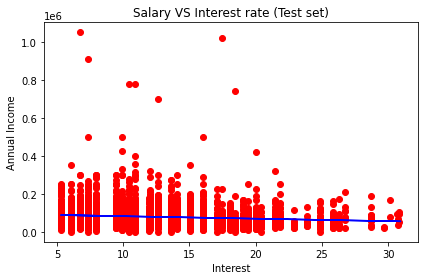

In [128]:
test = plt
test.scatter(X_test, y_test, color='red')
test.plot(X_train, regressor.predict(X_train), color='blue')
test.title('Salary VS Interest rate (Test set)')
test.xlabel('Interest')
test.ylabel('Annual Income')
test.show()

# Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [160]:
X=df.loc[:,['interest_rate','debt_to_income']]
y=df.loc[:,'annual_income']

In [167]:
X=X.dropna()

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [170]:
X=X.astype(int)

In [171]:
y=y.astype(int)

In [179]:
X_train=X_train.to_frame()
y_train=y_train.to_frame()
X_test=X_test.to_frame()

In [181]:
X_train= X_train.values.reshape(-1, 1)

y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [182]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [183]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [184]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9adb5248c0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f9adb52d3b0> (for post_execute):


KeyboardInterrupt: ignored